<a href="https://colab.research.google.com/github/datavers/portfolio_idea/blob/dataloading/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning the git repository - Initial step

In [1]:
! git clone https://github.com/datavers/portfolio_idea.git

Cloning into 'portfolio_idea'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 2), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), done.
Resolving deltas: 100% (2/2), done.


In [ ]:
! git branch -r

  origin/HEAD -> origin/main
  origin/dataloading
  origin/main


In [ ]:
! git switch dataloading

Branch 'dataloading' set up to track remote branch 'dataloading' from 'origin'.
Switched to a new branch 'dataloading'


In [ ]:
! git pull

Already up to date.


In [3]:
import os

In [10]:
! pip install --upgrade pip --q

In [11]:
! pip install pandas --q
! pip install seaborn --q
! pip install matplotlib --q
! pip install yfinance --q


In [92]:
! pip install scikit-learn --q

In [3]:
print("Jelenlegi munkakönyvtár:", os.getcwd())

Jelenlegi munkakönyvtár: /content


In [4]:
os.chdir('/content/portfolio_idea/')

In [5]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [8]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore

import matplotlib.pyplot as plt # type: ignore

Matplotlib is building the font cache; this may take a moment.


In [12]:
import yfinance as yf # type: ignore

## Import the sector ETFs and other instrumentums

In [15]:
sector_data = yf.download('XLE XLB XLI XLU XLV XLF XLY XLP VGT VOX VNQ', start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  11 of 11 completed


In [16]:
sector_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1164 entries, 2020-01-02 to 2024-08-16
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (VNQ, Open)       1164 non-null   float64
 1   (VNQ, High)       1164 non-null   float64
 2   (VNQ, Low)        1164 non-null   float64
 3   (VNQ, Close)      1164 non-null   float64
 4   (VNQ, Adj Close)  1164 non-null   float64
 5   (VNQ, Volume)     1164 non-null   int64  
 6   (VOX, Open)       1164 non-null   float64
 7   (VOX, High)       1164 non-null   float64
 8   (VOX, Low)        1164 non-null   float64
 9   (VOX, Close)      1164 non-null   float64
 10  (VOX, Adj Close)  1164 non-null   float64
 11  (VOX, Volume)     1164 non-null   int64  
 12  (XLP, Open)       1164 non-null   float64
 13  (XLP, High)       1164 non-null   float64
 14  (XLP, Low)        1164 non-null   float64
 15  (XLP, Close)      1164 non-null   float64
 16  (XLP, Adj Close)  1164 n

In [19]:
# Kiválasztjuk az összes 'Close' oszlopot
close_prices = sector_data.xs('Close', level=1, axis=1)

# Az oszlopok átnevezése a ticker nevére
close_prices.columns = close_prices.columns.get_level_values(0)

# Eredmény megjelenítése
print(close_prices)

Ticker            VNQ         VOX        XLP        XLE         XLV  \
Date                                                                  
2020-01-02  91.699997   95.019997  62.480000  60.580002  102.129997   
2020-01-03  92.269997   94.639999  62.380001  60.400002  101.239998   
2020-01-06  92.379997   95.760002  62.509998  60.869999  101.870003   
2020-01-07  91.349998   95.820000  62.029999  60.709999  101.669998   
2020-01-08  91.629997   96.309998  62.259998  59.709999  102.330002   
...               ...         ...        ...        ...         ...   
2024-08-12  90.419998  134.360001  78.750000  89.849998  149.410004   
2024-08-13  91.209999  136.350006  79.110001  88.980003  151.220001   
2024-08-14  91.449997  135.639999  79.470001  89.500000  151.759995   
2024-08-15  91.379997  137.229996  80.290001  90.570000  152.710007   
2024-08-16  91.330002  137.520004  80.510002  90.470001  152.869995   

Ticker            XLB        XLU        XLF         XLY         VGT  \
Date 

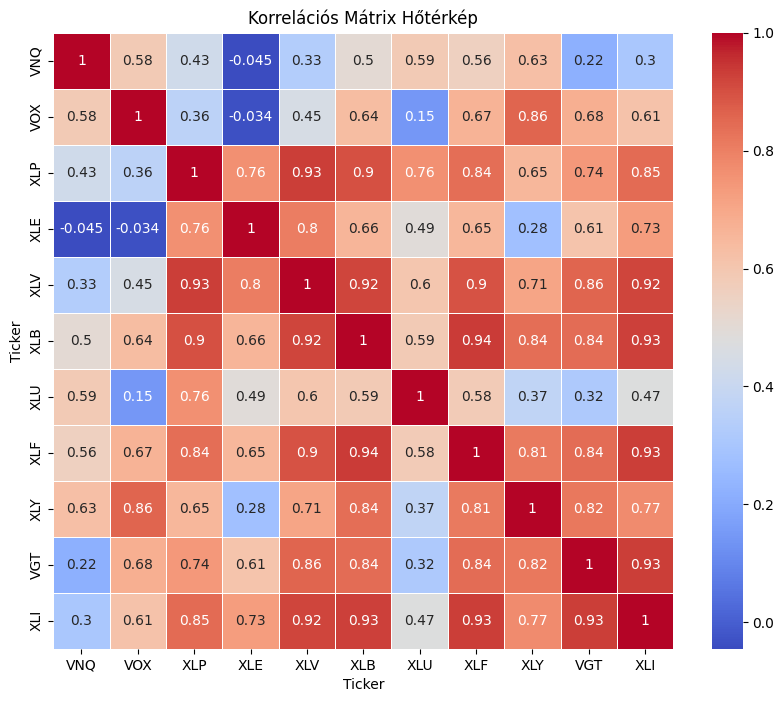

In [23]:
# Létrehozzuk a hőtérképet
corr_matrix = close_prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelációs Mátrix Hőtérkép')
plt.show()

In [ ]:
# Egyéb eszközosztályok adatainak a betöltése
other_tickers = yf.download('GLD GOVT', start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  2 of 2 completed


In [ ]:
# Kiválasztjuk az összes 'Close' oszlopot
close_prices_other = other_tickers.xs('Close', level=1, axis=1)

# Az oszlopok átnevezése a ticker nevére
close_prices_other.columns = close_prices_other.columns.get_level_values(0)

# Eredmény megjelenítése
print(close_prices_other)

Ticker             GLD       GOVT
Date                             
2020-01-02  143.949997  25.990000
2020-01-03  145.860001  26.120001
2020-01-06  147.389999  26.090000
2020-01-07  147.970001  26.040001
2020-01-08  146.860001  26.000000
...                ...        ...
2024-07-30  222.520004  22.879999
2024-07-31  226.550003  23.010000
2024-08-01  225.770004  23.040001
2024-08-02  225.339996  23.350000
2024-08-05  222.839996  23.385000

[1155 rows x 2 columns]


In [ ]:
sp500 = yf.Ticker('SPY')

In [ ]:
sp500_hist = sp500.history(start='2020-01-01')

In [ ]:
sp500_hist = sp500_hist['Close']

## Correlation analysis

In [29]:
from itertools import combinations

# Határérték az erős korrelációra
threshold = 0.45

# Oszlopnevek lekérése
columns = corr_matrix.columns

# Lehetséges hármas kombinációk létrehozása
combs = combinations(columns, 4)
for comb in combs:
    print(comb)   


('VNQ', 'VOX', 'XLP')
('VNQ', 'VOX', 'XLE')
('VNQ', 'VOX', 'XLV')
('VNQ', 'VOX', 'XLB')
('VNQ', 'VOX', 'XLU')
('VNQ', 'VOX', 'XLF')
('VNQ', 'VOX', 'XLY')
('VNQ', 'VOX', 'VGT')
('VNQ', 'VOX', 'XLI')
('VNQ', 'XLP', 'XLE')
('VNQ', 'XLP', 'XLV')
('VNQ', 'XLP', 'XLB')
('VNQ', 'XLP', 'XLU')
('VNQ', 'XLP', 'XLF')
('VNQ', 'XLP', 'XLY')
('VNQ', 'XLP', 'VGT')
('VNQ', 'XLP', 'XLI')
('VNQ', 'XLE', 'XLV')
('VNQ', 'XLE', 'XLB')
('VNQ', 'XLE', 'XLU')
('VNQ', 'XLE', 'XLF')
('VNQ', 'XLE', 'XLY')
('VNQ', 'XLE', 'VGT')
('VNQ', 'XLE', 'XLI')
('VNQ', 'XLV', 'XLB')
('VNQ', 'XLV', 'XLU')
('VNQ', 'XLV', 'XLF')
('VNQ', 'XLV', 'XLY')
('VNQ', 'XLV', 'VGT')
('VNQ', 'XLV', 'XLI')
('VNQ', 'XLB', 'XLU')
('VNQ', 'XLB', 'XLF')
('VNQ', 'XLB', 'XLY')
('VNQ', 'XLB', 'VGT')
('VNQ', 'XLB', 'XLI')
('VNQ', 'XLU', 'XLF')
('VNQ', 'XLU', 'XLY')
('VNQ', 'XLU', 'VGT')
('VNQ', 'XLU', 'XLI')
('VNQ', 'XLF', 'XLY')
('VNQ', 'XLF', 'VGT')
('VNQ', 'XLF', 'XLI')
('VNQ', 'XLY', 'VGT')
('VNQ', 'XLY', 'XLI')
('VNQ', 'VGT', 'XLI')
('VOX', 'X

In [37]:
from itertools import combinations

# Határérték az erős korrelációra
threshold = 0.6

# Oszlopnevek lekérése
columns = corr_matrix.columns

# Lehetséges hármas kombinációk létrehozása
combs = combinations(columns, 4)

# Hármas kombinációk szűrése a korrelációs értékek alapján
selected_combinations = []
for comb in combs:
    if all(corr_matrix.loc[comb[i], comb[j]] < threshold for i in range(4) for j in range(i+1, 4)):
        selected_combinations.append(comb)

# Megjelenítjük azokat a hármas kombinációkat, amelyek megfelelnek a feltételnek
print("Hármas kombinációk, amelyek korrelációi 0.5 alatt vannak:")
print(selected_combinations[0])

Hármas kombinációk, amelyek korrelációi 0.5 alatt vannak:
('VNQ', 'VOX', 'XLE', 'XLU')


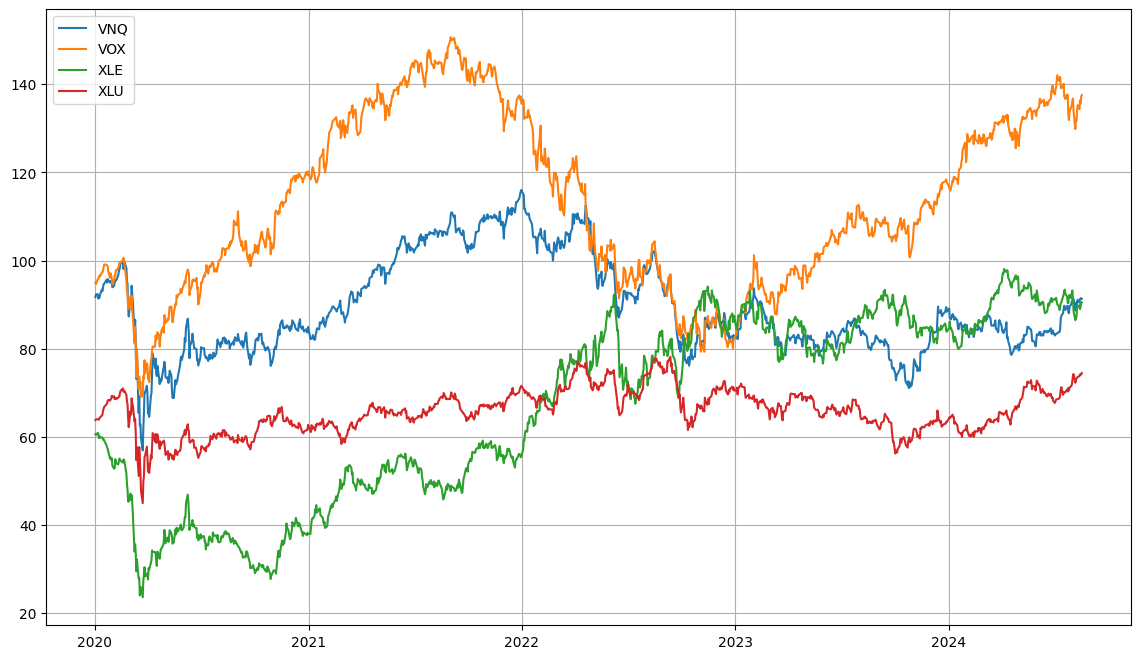

In [43]:
portfolio = close_prices[list(selected_combinations[0])]
plt.figure(figsize=(14, 8))
for ticker in portfolio.columns:
    plt.plot(portfolio.index, portfolio[ticker], label=f'{ticker}')

plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Ticker', ylabel='Ticker'>

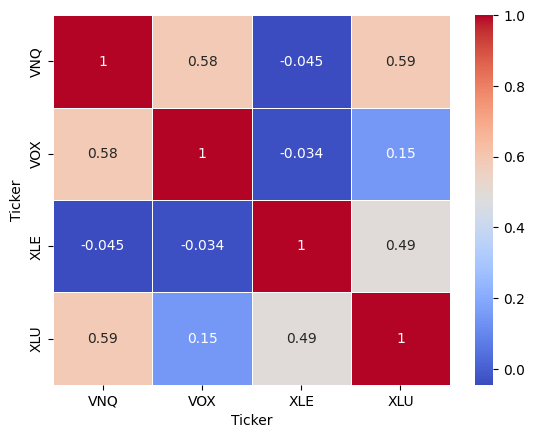

In [45]:
sns.heatmap(portfolio.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

## Második verzió

In [61]:
# Részvények kiválasztása a fenti ETF-ekből
stocks = 'XOM GOOG PLD DUK'
others = 'GBTC IAU'
# Árfolyamok betöltése majd záró értékek kiválasztása
stocks_data = yf.download(stocks, start='2020-01-01', group_by='ticker')
others_data = yf.download(others, start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  2 of 2 completed


In [62]:
stocks_close = stocks_data.xs("Close", level=1, axis=1)
stocks_close.columns = stocks_close.columns.get_level_values(0)

others_close = others_data.xs("Close", level=1, axis=1)
others_close.columns = others_close.columns.get_level_values(0)

<Axes: xlabel='Ticker', ylabel='Ticker'>

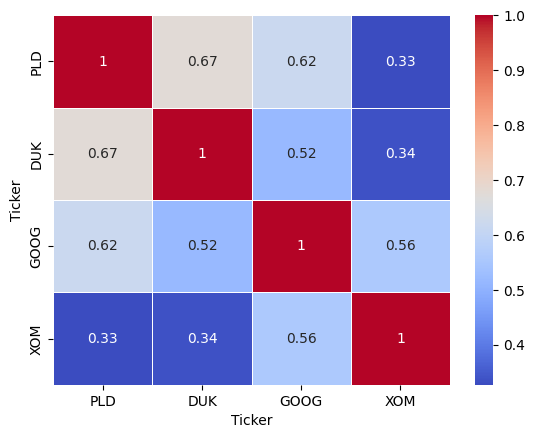

In [59]:
sns.heatmap(stocks_close.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [63]:
mixed_portfolio = pd.merge(stocks_close, others_close, left_index=True, right_index=True)
mixed_portfolio

Ticker,GOOG,PLD,XOM,DUK,GBTC,IAU
Date,,,,,,
2020-01-02,68.368500,88.400002,70.900002,90.339996,7.980000,29.219999
2020-01-03,68.032997,89.389999,70.330002,90.400002,8.590000,29.620001
2020-01-06,69.710503,89.040001,70.870003,90.839996,8.990000,29.920000
2020-01-07,69.667000,88.470001,70.290001,90.269997,10.100000,30.040001
2020-01-08,70.216003,88.949997,69.230003,90.400002,9.322000,29.820000
...,...,...,...,...,...,...
2024-08-12,163.949997,119.989998,119.000000,113.370003,47.099998,46.669998
2024-08-13,165.929993,122.680000,117.860001,113.720001,48.500000,46.599998
2024-08-14,162.029999,123.419998,118.949997,113.459999,46.990002,46.230000


<Axes: xlabel='Ticker', ylabel='Ticker'>

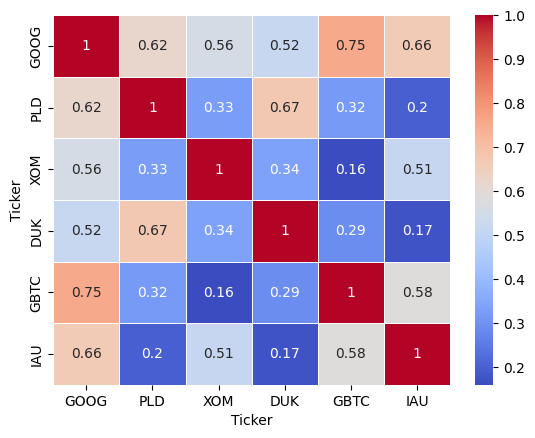

In [75]:
portfolio_matrix = mixed_portfolio.corr()
sns.heatmap(mixed_portfolio.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [89]:
# Van-e 4 olyan termék, amely kevésbé korrelál együtt?

# Határérték az erős korrelációra
threshold = 0.6

# Oszlopnevek lekérése
columns = portfolio_matrix.columns

# Lehetséges hármas kombinációk létrehozása
combs = combinations(columns, 4)

# Hármas kombinációk szűrése a korrelációs értékek alapján
selected_combinations = []
for comb in combs:
    if all(portfolio_matrix.loc[comb[i], comb[j]] < threshold for i in range(4) for j in range(i+1, 4)):
        selected_combinations.append(comb)

# Megjelenítjük azokat a hármas kombinációkat, amelyek megfelelnek a feltételnek
print("Hármas kombinációk, amelyek korrelációi 0.6 alatt vannak:")
print(selected_combinations[0])

Hármas kombinációk, amelyek korrelációi 0.6 alatt vannak:
('PLD', 'XOM', 'GBTC', 'IAU')


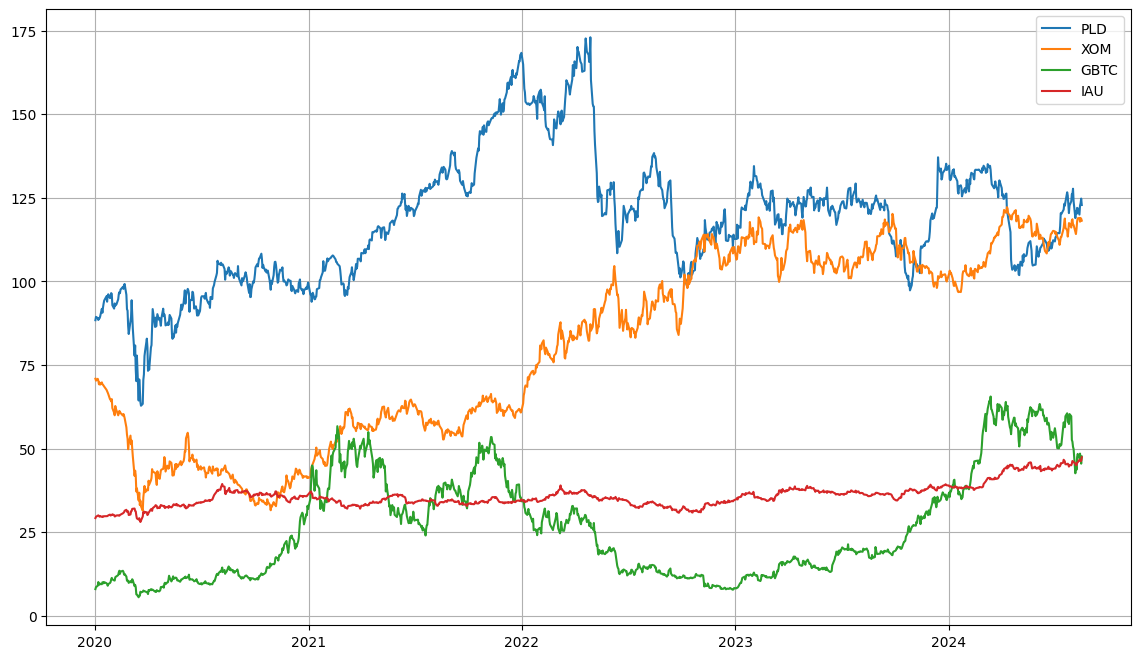

In [101]:
portfolio = mixed_portfolio[list(selected_combinations[0])]
plt.figure(figsize=(14, 8))
for ticker in portfolio.columns:
    plt.plot(portfolio.index, portfolio[ticker], label=f'{ticker}')

plt.legend()
plt.grid(True)
plt.show()

Szeretném normalizálni is az árfolyamokat, csak azért, hogy jobban összehasonlíthatóak legyenek

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
portfolio_norm = pd.DataFrame(scaler.fit_transform(portfolio), columns=portfolio.columns)

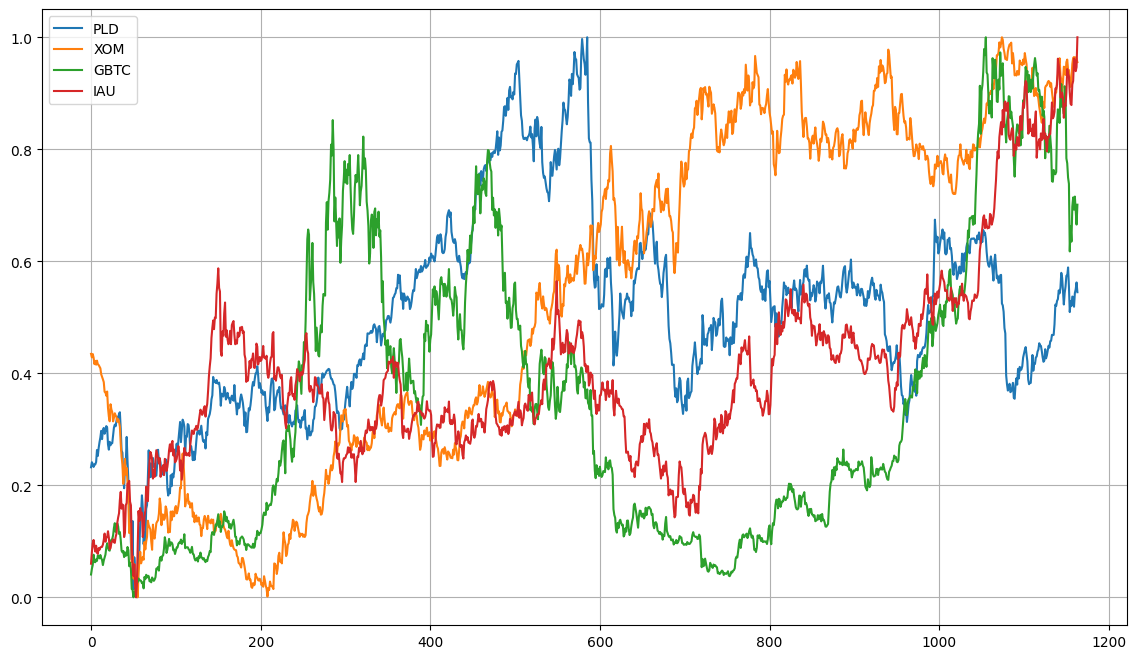

In [102]:
plt.figure(figsize=(14, 8))
for ticker in portfolio_norm.columns:
    plt.plot(portfolio_norm.index, portfolio_norm[ticker], label=f'{ticker}')

plt.legend()
plt.grid(True)
plt.show()

Befketetett összeg számítása

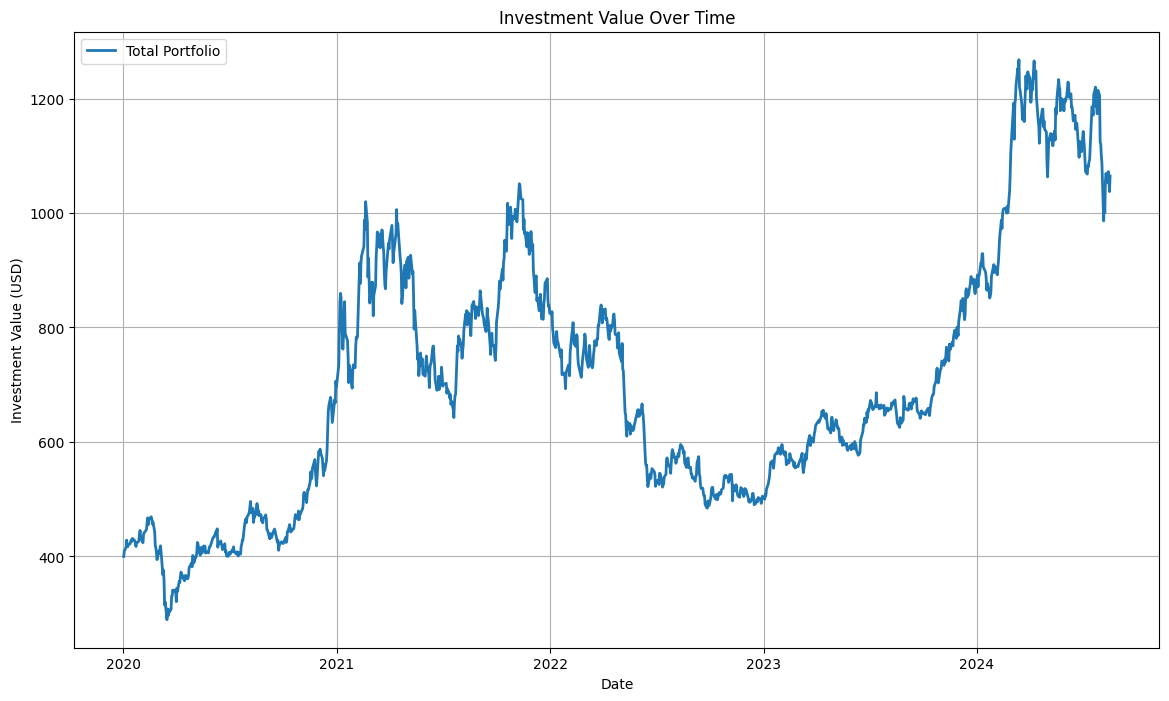

In [103]:
# Kezdeti befektetés összege
initial_investment = 100

# Kezdeti árak
initial_prices = portfolio.iloc[0]

# Az egyes tickerekre vonatkozó befektetési értékek kiszámítása időben
investment_values = pd.DataFrame(index=portfolio.index)
tickers = ['PLD', 'XOM', 'GBTC', 'IAU']

for ticker in tickers:
    shares = initial_investment / initial_prices[ticker]

    investment_values[ticker] = portfolio[ticker] * shares

# A teljes portfólió értékének kiszámítása időben
portfolio_value = investment_values.sum(axis=1)

# Adatok vizualizálása
plt.figure(figsize=(14, 8))

# Teljes portfólió ábrázolása
plt.plot(portfolio_value.index, portfolio_value, label='Total Portfolio', linewidth=2, linestyle='-')

# SP500 ETF
# plt.plot(sp500_hist.index, sp500_hist, label='SPY', linewidth=2, linestyle='-')

# Bond ETF

plt.title('Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

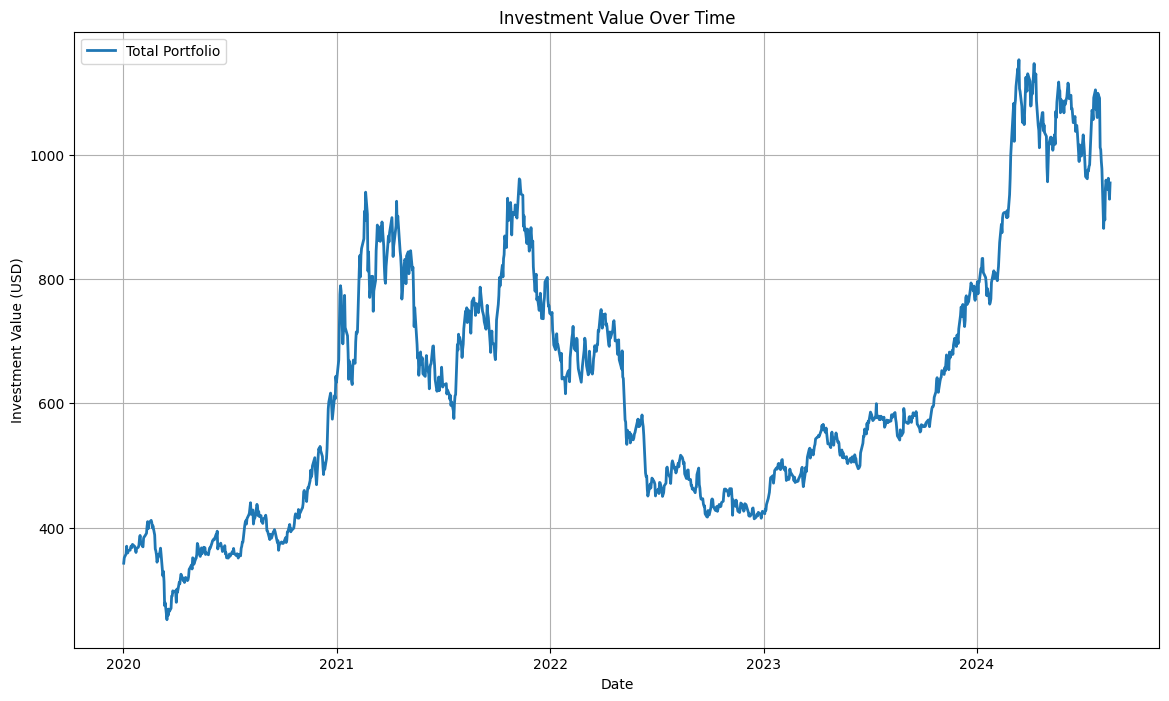

In [104]:
# Kezdeti befektetés összege
initial_investment = 100

# Kezdeti árak
initial_prices = portfolio.iloc[0]

# Az egyes tickerekre vonatkozó befektetési értékek kiszámítása időben
investment_values = pd.DataFrame(index=portfolio.index)
tickers = ['PLD', 'XOM', 'GBTC', 'IAU']

for ticker in tickers:
    shares = initial_investment // initial_prices[ticker]

    investment_values[ticker] = portfolio[ticker] * shares

# A teljes portfólió értékének kiszámítása időben
portfolio_value = investment_values.sum(axis=1)

# Adatok vizualizálása
plt.figure(figsize=(14, 8))

# Teljes portfólió ábrázolása
plt.plot(portfolio_value.index, portfolio_value, label='Total Portfolio', linewidth=2, linestyle='-')

# SP500 ETF
# plt.plot(sp500_hist.index, sp500_hist, label='SPY', linewidth=2, linestyle='-')

# Bond ETF

plt.title('Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Kezdeti befektetés
initial_investment_gov = 400 * 295  # Tegyük fel, hogy 10 000 HUF-t fektettünk be 2020-ban USD alapon

# Állampapír éves hozama (2020-ban elérhető)
annual_yield = 4.95 / 100

# Évek száma
years = 4  # 2020-tól 2024-ig

# A befektetés értékének kiszámítása az évek során
investment_value_gov = initial_investment_gov * (1 + annual_yield) ** years

print(f"A befektetés értéke a kezdetekkor: {initial_investment_gov:.0f}, 2024-ben: {investment_value_gov:.0f} HUF, a hozama pedig {((investment_value_gov/initial_investment_gov)-1)*100:.2f}%")

A befektetés értéke a kezdetekkor: 118000, 2024-ben: 143157 HUF, a hozama pedig 21.32%


Részvények esetén - Diverzifikált portfólió

In [110]:
# Kezdeti befektetés
initial_investment = portfolio_value.iloc[0] * 295

# Befektetés értéke 2024-ben
initial_investment_actual = portfolio_value.iloc[-1] * 295

print(f"A befektetés értéke a kezdetekkor: {initial_investment:.0f}, 2024-ben: {actual_value:.0f} HUF, a hozama pedig {((actual_value/initial_investment)-1)*100:.2f}%")

A befektetés értéke a kezdetekkor: 101102, 2024-ben: 143157 HUF, a hozama pedig 41.60%


Infláció

In [115]:
# Kezdeti befektetés
initial_investment = initial_investment_gov

# Befektetés értéke 2024-ben
actual_value = investment_value_gov

# Inflációs ráták Magyarországon
inflation_rates = {
    2020: 3.3,
    2021: 5.1,
    2022: 14.5,
    2023: 18.1,
    2024: 4  # Feltételezett érték
}

# Inflációs faktorok kiszámítása
cumulative_inflation_factor = 1.0
for year, inflation_rate in inflation_rates.items():
    cumulative_inflation_factor *= (1 + inflation_rate / 100)

# Inflációval korrigált érték kiszámítása
inflation_adjusted_final_value = actual_value / cumulative_inflation_factor

print(f"A befektetés inflációval korrigált értéke 2024-ben: {inflation_adjusted_final_value:.2f} HUF, a hozama pedig {((inflation_adjusted_final_value/initial_investment)-1)*100:.2f}%")

A befektetés inflációval korrigált értéke 2024-ben: 93760.52 HUF, a hozama pedig -20.54%


In [116]:
# Kezdeti befektetés
initial_investment = initial_investment

# Befektetés értéke 2024-ben
actual_value = initial_investment_actual

# Inflációs ráták Magyarországon
inflation_rates = {
    2020: 3.3,
    2021: 5.1,
    2022: 14.5,
    2023: 18.1,
    2024: 4  # Feltételezett érték
}

# Inflációs faktorok kiszámítása
cumulative_inflation_factor = 1.0
for year, inflation_rate in inflation_rates.items():
    cumulative_inflation_factor *= (1 + inflation_rate / 100)

# Inflációval korrigált érték kiszámítása
inflation_adjusted_final_value = actual_value / cumulative_inflation_factor

print(f"A befektetés inflációval korrigált értéke 2024-ben: {inflation_adjusted_final_value:.2f} HUF, a hozama pedig {((inflation_adjusted_final_value/initial_investment)-1)*100:.2f}%")

A befektetés inflációval korrigált értéke 2024-ben: 184473.32 HUF, a hozama pedig 56.33%
